# Loading data

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_excel('vente_maillots_de_bain.xlsx',sheet_name='Sheet2')
df.head()

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="Years", y="Sales", data=df)
plt.show()

In [20]:
df['Time']= np.arange(1, 109, 1) # debut (inclus) , fin (non inclus) , pas
df.head()

,Years,Sales,Unnamed: 2,Time
0,2001-01-01,139.7,NaN,1
1,2001-02-01,114.3,NaN,2
2,2001-03-01,101.6,NaN,3
3,2001-04-01,152.4,NaN,4
4,2001-05-01,215.9,NaN,5


In [26]:
df_train = df.loc[:81]
df_test = df.loc[82:]

In [30]:
df_train.tail()

,Years,Sales,Unnamed: 2,Time
77,2007-06-01,584.2,NaN,78
78,2007-07-01,609.6,NaN,79
79,2007-08-01,558.8,NaN,80
80,2007-09-01,508.0,NaN,81
81,2007-10-01,495.3,NaN,82


In [29]:
df_test.head()

,Years,Sales,Unnamed: 2,Time
82,2007-11-01,444.5,NaN,83
83,2007-12-01,419.1,NaN,84
84,2008-01-01,431.8,NaN,85
85,2008-02-01,444.5,NaN,86
86,2008-03-01,495.3,NaN,87


In [48]:
# On utilise [[ ]] pour se referer à la colonne et non aux valeurs de celle-ci
x_train = df_train[['Time']].values
x_test = df_test[['Time']].values

y_train = df_train[['Sales']].values
y_test = df_test[['Sales']].values

Utilisation de Sklearn pour créer un modèle regressif

In [45]:
model_trend = LinearRegression()

In [46]:
model_trend.fit(x_train, y_train)

LinearRegression()

In [62]:
y_fitted_values = model_trend.predict(x_train)
y_predicted_values = model_trend.predict(x_test)

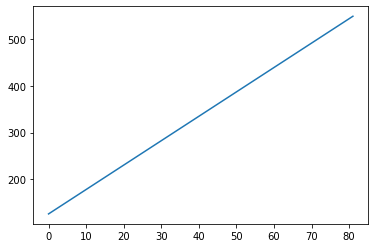

In [63]:
plt.plot(y_fitted_values)

Calculer l'intervalle de confiance:

- Calculer l'erreur
- Calculer l'écart type de l'erreur
- Choisir l'intervalle de confiance que l'on souhaite

In [52]:
error = y_train - y_fitted_values
std_error = error.std() # calcul de l'écart type de l'erreur.
interval = 4.4 * std_error

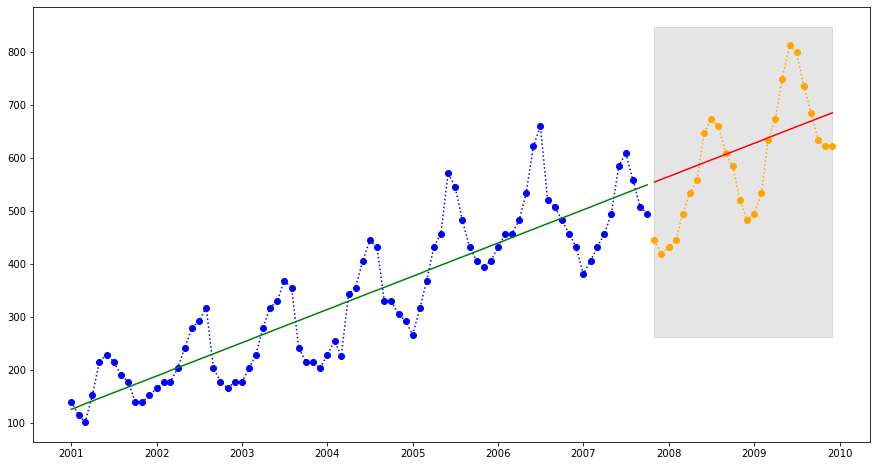

In [77]:
plt.figure(figsize=(15, 8))
# train base
plt.plot(df_train["Years"], y_train, "bo:") #bo: B = Bleu,  O = utilisation de gros points,  : = ligne en pointillés
plt.plot(df_train['Years'], y_fitted_values, "g")
#test base
plt.plot(df_test["Years"], y_test, 'o:', color="orange")
plt.plot(df_test['Years'], y_predicted_values, "r")

marge_min = y_predicted_values - interval
marge_max = y_predicted_values + interval
plt.fill_between(df_test['Years'], marge_max[0], marge_min[0], alpha=0.1, color="black")
plt.show()